# Diederske grupe 
## Trenutno: Le $\mathcal L _{\text{rel}}$, $\mathcal L _{irr}$ moram še dodati
Študiramo (2d) upodobitve diederskih grup
 $D_{2n} = <r, s \mid r^n = s^2 = (rs)^2 = 1>$.

### $d\mathcal L_{\text{rel}}$
$$
 \mathcal L_{\text{rel}} = 
  \frac{1}{3}(||S^2 - I ||^2_F + ||R^n -I||^2_F + || (RS)^2 - I ||^2_F),
$$
kjer je $R=\rho(r)$ in $S = \rho(s)$.

Velja
$$
\frac{d}{dX}||X^n-I||_F^2=2\left (\sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i  -nX^{n-1}  \right )^T 
$$
Za lažje računanje uvedemo
$$
Q(X,n) = \sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i -nX^{n-1}
$$
Velja še 
$$
\frac{d}{dR}||(RS)^2 - I||_F^2 = 2\left(SRS(RS)^{T^2} + S(RS)^{T^2} RS - 2SRS        \right ) ^T
$$ 
in 
$$
\frac{d}{dR}||(RS)^2 - I||_F^2 = 2 \left (RS (RS)^{T^2} R + (RS)^{T^2}RSR - 2RSR                 \right) ^T
$$


In [52]:
# definiraj grad_L
import numpy as np

# from numpy.linalg import matrix_power as pow
from numpy.linalg import norm


def pow(A, n):
    dim = A.shape[0]
    X = np.eye(dim)
    for i in range(n):
        X = X @ A
    return X

def norm_square_RS_minus_I_by_R(R, S):
    """
    Returns 2(  SRS(RS)^{T^2} + S(RS)^{T^2} RS - 2SRS) ^T
    """
    RST = pow((R @ S).transpose(), 2)
    ans = S @ R @ S @ RST + S @ RST @ R @ S - 2 * S @ R @ S
    return 2 * ans.transpose()

def norm_square_RS_minus_I_by_S(R, S):
    """
    Returns  2  (RS (RS)^{T^2} R + (RS)^{T^2}RSR - 2RSR) ^T
    """
    RST = pow((R @ S).transpose(), 2)
    ans = R @ S @ RST @ R + RST @ R @ S @ R - 2 * R @ S @ R
    return 2 * ans.transpose()

def Q(X, n):
    """
    Returns 1/2 * (  d/dX (||X^n - I||^2) )^T
    """
    dim = X.shape[0]
    ans = np.zeros(X.shape)
    for i in range(n):
        ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
    ans -= n * pow(X, n-1)
    return ans


def d_Lrel_dR(R, S, n):
    return (1 / 3) *( 2 * Q(R, n).transpose() +   norm_square_RS_minus_I_by_R(R, S) )


def d_Lrel_dS(R, S):
    return (1 / 3) * (2 * Q(S, 2).transpose() + norm_square_RS_minus_I_by_S(R, S))


def Lrel(R, S, n):
    dim = R.shape[0]
    eye = np.eye(dim)
    return (1 / 3) * (norm(pow(R,n) - eye, ord='fro')**2 
                    + norm(pow(S,2) - eye, ord='fro')**2
                    + norm(pow(R@S,2) - eye, ord='fro') **2)

### $d \mathcal L_{\text{irr}}$
$$
 \mathcal L_{\text{irr}} =
 (|\chi|-1)^2
 \\= \left( 
    (\frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  ) -1
    \right )^2,
$$
kjer je $R=\rho(r)$, $S = \rho(s)$ in $|\chi| = \frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  )$
Velja
$$
d(|\chi| -1) = d|\chi| = \text{tr}\left((\frac{1}{n} \sum_{i=0}^{n-1} \text{tr}(R^iS)R^i       )dS           \right) +\\
\text{tr}\left((\frac{1}{n} \sum_{i=1}^{n-1} \text{tr}(R^i)iR^{i-1}           )dR  \right)+\\
\text{tr}\left((\frac{1}{n} \sum_{i=1}^{n-1} \text{tr}(R^iS)(\sum_{j=0}^{i-1}  R^{i-j-1}SR^j)         )dR \right)
$$

$$
\frac{d}{dR}(|\chi| -1)^2 =\\ \frac{2}{n}(1 - |\chi|) 
\left (
\sum_{i=1}^{n-1} \text{tr}(R^i)iR^{i-1} + 
\text{tr}(R^iS)(\sum_{j=0}^{i-1}  R^{i-j-1}SR^j)         
\right)^T
$$

$$
\frac{d}{dS}(|\chi| -1)^2 \\= \frac{2}{n}(1 - |\chi|)
 \left (\sum_{i=0}^{n-1} \text{tr}(R^iS)R^i      \right) ^T
$$


In [53]:
def norm_chi(R, S, n):
    ans = 0
    for i in range(n):
        ans += np.abs(np.trace(pow(R, i))) ** 2
        ans += np.abs(np.trace(pow(R, i) @ S)) ** 2
    ans /= 2 * n
    return ans


def Lirr(R, S, n):
    return (norm_chi(R, S, n) - 1) ** 2


def d_Lirr_dR(R, S, n):
    """
    Returns
      2 * (  d/dR (||chi(R,S,n)||^2 - 1) )^T, which is equal to
    2/n(1 - |chi|) 
(
sum_{i=1}^{n-1} tr(R^i)iR^{i-1} + 
tr(R^iS)(sum_{j=0}^{i-1}  R^{i-j-1}SR^j)         
)^T$
    """
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(1, n):
        ans += np.trace(pow(R, i)) * i * pow(R, i - 1)
        ans += np.trace(pow(R, i) @ S) * (sum([pow(R, i - j - 1) @ S @ pow(R, j) for j in range(i)]))
    ans = ans.transpose()
    ans *= 2 * (norm_chi(R, S, n) - 1) / n
    return ans


def d_Lirr_dS(R, S, n):
    """
    Returns 2/n(1 - |chi|)
  (sum_{i=0}^{n-1} tr(R^iS)R^i      ) ^T
    """
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(0, n):
        ans += np.trace( pow(R, i)@S) * pow(R, i)
    ans = ans.transpose()
    ans *= 2 * (norm_chi(R, S, n) -1) / n
    return ans

### $\mathcal L_{unitary}$
$$
\mathcal L_{unitary} = \frac{1}{|S|} \sum_{s \in S} ||\rho(s) \rho(s)^H - I||
$$
$$
\frac{d}{dS}||SS^H - I||_F^2= \dotsc = 4(SS^TS -S)
$$

In [70]:
def Lunitary(R, S):
    """
    Returns 1/2 * (||R^T R - I||^2 + ||S^T S - I||^2)
    """
    dim = R.shape[0]
    eye = np.eye(dim)
    return (1 / 2) * (norm(R.transpose() @ R - eye, ord='fro')**2 + norm(S.transpose() @ S - eye, ord='fro')**2)
def unitary_norm(X):
    """
    Returns d/dx (||X^T X - I||^2)
    """ 
    return 4 * (X @ X.transpose() @ X - X )

def d_Lunitary_dR(R):
    """
    Returns 2 * (d/dR (||R^T R - I||^2))^T
    """
    return 0.5 *unitary_norm(R)
def d_Lunitary_dS(R, S):
    """
    Returns 2 * (d/dS (||S^T S - I||^2))^T
    """
    return 0.5 * unitary_norm(S)


In [54]:
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])

In [72]:
Lirr(R0, S0, 3), Lrel(R0, S0, 3), d_Lirr_dR(R0, S0, 3), d_Lirr_dS(R0, S0, 3), d_Lrel_dR(R0, S0, 3), d_Lrel_dS(R0, S0), Lunitary(R0, S0), d_Lunitary_dR(R0), d_Lunitary_dS(R0, S0)

(np.float64(0.0),
 np.float64(2.9295729763136e-31),
 array([[ 0., -0.],
        [ 0.,  0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[ 1.25825276e-15, -1.48029737e-16],
        [-1.48029737e-16,  1.25825276e-15]]),
 array([[-9.91611210e-18, -1.48029737e-16],
        [-1.48029737e-16, -3.28692044e-32]]),
 np.float64(1.2989674277947135e-32),
 array([[ 1.11022302e-16,  2.22044605e-16],
        [-2.22044605e-16,  1.11022302e-16]]),
 array([[0., 0.],
        [0., 0.]]))

In [56]:
# poženi solve_ivp
from scipy.integrate import solve_ivp
n= 3
dim = 2
t_max = 1




def neg_grad(t, z):
    R = np.reshape(z[:len(z)//2], (dim, dim))
    S = np.reshape(z[len(z)//2:], (dim, dim))

    dR = - d_Lrel_dR(R,S, n) - d_Lirr_dR(R,S, n)
    dS = - d_Lrel_dS(R, S) - d_Lirr_dS(R, S, n)

    dR = dR.flatten()
    dS =  dS.flatten()
    return np.concatenate((dR, dS), axis=None)

def convergence_event(t, z, eps):
    R = np.reshape(z[:len(z)//2], (dim, dim))
    S = np.reshape(z[len(z)//2:], (dim, dim))
    loss = Lirr(R, S, n) + Lrel(R,S,n)
    return loss - eps
convergence_event.terminal = True
convergence_event.direction = -1   # or 0 if you want it to trigger in any direction

def get_convergence_event(eps):
    def g(t, z):
        return convergence_event(t, z, eps)
    return g



R0= np.random.rand(2,2)*10
#S0= np.random.rand(2,2)*10

S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
S0 =S0 + np.random.normal(scale=0.1, size=(2,2))
R0 =R0 + np.random.normal(scale=0.1, size=(2,2))

S0 = S0.flatten()
R0 = R0.flatten()

P0 = np.concatenate((R0, S0), axis=None)


In [57]:
solution = solve_ivp(neg_grad, (0, 100), P0,     events=get_convergence_event(0.001))#, method='Radau')


In [58]:
def get_matrices(solution_y, index):
      z = solution_y.transpose()[index]
      R = np.reshape(z[:len(z)//2], (dim, dim))
      S = np.reshape(z[len(z)//2:], (dim, dim))
      return R, S
def get_characters(solution_y):
    solutions = solution_y.transpose()
    char_R = []
    char_S=[]
    for z in solutions:
            R = np.reshape(z[:len(z)//2], (dim, dim))
            S = np.reshape(z[len(z)//2:], (dim, dim))
            char_R.append(np.trace(R))
            char_S.append(np.trace(S))

    return char_R, char_S

charR, charS = get_characters(solution.y)

100%|██████████| 50/50 [00:06<00:00,  8.22it/s]


Text(0.5, 1.0, 'Trajectory')

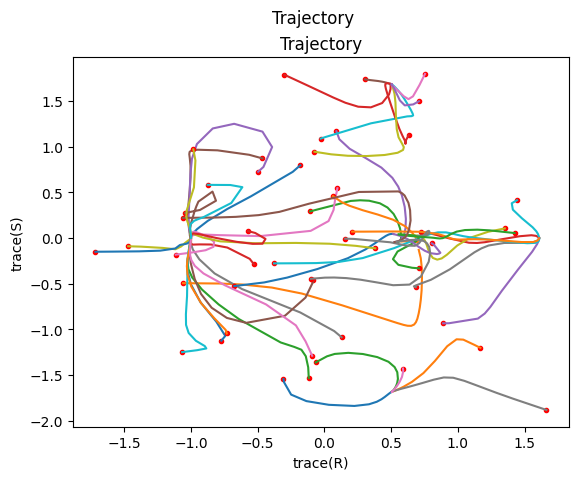

In [59]:
import matplotlib.pyplot as plt
from tqdm import tqdm
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
fig, axs = plt.subplots(1)
fig.suptitle(f'Trajectory')

t_max=4
sample_size = 50
for _ in tqdm(range(sample_size), total = sample_size):
    P0 = 2 * np.random.rand((8)) - 1
   # print(P0)
    solution = solve_ivp(neg_grad, (0, t_max), P0, events=get_convergence_event(0.001))#, method='Radau')
    charR, charS = get_characters(solution.y)



    # plot initial step
    axs.plot(charR[0], charS[0], 'ro', label='Initial point', markersize=3)
   # axs.plot(1, 0, 'go', label='rho_k', markersize=2)

    axs.plot(charR, charS)

#for index, (cR, cS) in enumerate(zip(charR, charS)):
#    axs.plot(cR, cS, color=cmap(cmap_norm(solution.t[index])), lw=2)

axs.set_xlabel('trace(R)')
axs.set_ylabel('trace(S)')
#axs.legend()
axs.set_title('Trajectory')







In [60]:
np.cos(2*np.pi/3), -np.cos(2*2*np.pi/3)

(np.float64(-0.4999999999999998), np.float64(0.5000000000000004))

In [61]:
solution.y[0][0], solution.y[1][0]

(np.float64(-0.2240244202935815), np.float64(-0.3260512408663765))

### Loss function and grids
Naj bosta 
$$
R = \begin{bmatrix} a & b \\ c & d
\end{bmatrix}, \quad 
S = \begin{bmatrix} x & y\\ z & w
\end{bmatrix}
$$ 
realni matriki. Za prikaz rezultatov preizušam različne metode projekcij.

### $a = d$, $x = w$
Omejimo se na matrike oblike $R = \begin{bmatrix} a & b \\ c & a
\end{bmatrix}, \quad 
S = \begin{bmatrix} x & y\\ z & x
\end{bmatrix}$. Za fiske $b, c, y, z$ jih parametriziram s karakterjem.

In [62]:
def loss(R, S, n):
    return Lirr(R, S, n) + Lrel(R, S, n)

def char_to_semi_diag(char, b, c):
    a = char /2
    return np.array([[a, b], [c, a]])

### Ortogonala grupa - parametrizacija $p \colon R \to O(2)$

Da rezultate obeh matrik spravim na en graf, lahko uporabim parametrizacijo 
$$
p \colon (-1,1) \to O(2)  \\
x \mapsto \begin{bmatrix}
x & -\sqrt{1 - x^2} \\
\sqrt{1 - x^2} & x 
\end{bmatrix}.
$$.
Definiram $R = R(x) = p(x)$ in $S = S(y) = p(y)$.

Velja 
$$
\frac{d}{dx} \mathcal L(R,S) = \text{tr}( {\frac{d\mathcal L}{dR}}^T \frac{dR}{dx}  ) 
$$
in
$$
\frac{d}{dy} \mathcal L(R,S) = \text{tr}( {\frac{d\mathcal L}{dS}}^T \frac{dS}{dy}  ) .
$$
Velja še   $\frac{dR}{dx} =p'(x) = \begin{bmatrix}
1 & (1 - x^2)^{-0.5} \\
-(1 - x^2)^{-0.5} & 1 
\end{bmatrix}.
$

In [63]:
def p(x):
    y = np.sqrt(1 - x**2)
    return np.array([[x, -y],[y, x]])

def dp(x):
    y = 1/np.sqrt(1 - x**2)
    return np.array([[1, -y], [y, 1]])

def dL_dx(x, y, n):
    """
    Returns dL/dx
    """
    R = p(x)
    S = p(y)
    dL_dR = d_Lrel_dR(R, S, n) + d_Lirr_dR(R, S, n)
    dR_dx = dp(x)
    return np.trace(dL_dR.transpose() @ dR_dx)

def dL_dy(x, y, n):
    """
    Returns dL/dy
    """
    R = p(x)
    S = p(y)
    dL_dR = d_Lrel_dS(R, S) + d_Lirr_dS(R, S, n)
    dS_dy = dp(y)
    return np.trace(dL_dR.transpose() @ dS_dy)

In [64]:
# r naj bo parameter za R, s pa za S. 
def neg_grad_param(t, z):
    # collect points
    r, s = z

    return - dL_dx(r, s, n), - dL_dy(r, s, n)

def convergence_event_param(t, z, eps):
    '''Check, if loss < eps'''
    # collect points
    r, s = z
    # convert to matrices
    R = p(r)
    S = p(s)
    # get loss:
    loss = Lirr(R, S, n) + Lrel(R,S,n)
    return loss - eps

convergence_event_param.terminal = True
convergence_event_param.direction = -1   # or 0 if you want it to trigger in any direction

def get_convergence_event_param(eps):
    def g(t, z):
        return convergence_event_param(t, z, eps)
    return g

In [65]:
import numpy as np
from tqdm import tqdm
# grid settings 
resolution = 50
t_max = 2
min_param = -0.9
max_param = 0.9
# prepare grid
x = np.linspace(min_param, max_param, resolution)
y = np.linspace(min_param, max_param, resolution)
x, y = np.meshgrid(x, y)
solutions = []

grid = np.zeros((resolution, resolution, 1))
# solve gradient flow equation for each pixel
for index, (x0, y0) in tqdm(enumerate(zip(x.flatten(), y.flatten())) , total=resolution ** 2):
    # no limit option:
    # solution = solve_ivp(neg_grad_param, (0, t_max), (x0, y0))
    solution = solve_ivp(neg_grad_param, (0, 100), (x0, y0), events=get_convergence_event_param(0.0001))
    solutions.append(solution)
    
    # color of the pixel is atan2 of final point
    grid[index // resolution][index % resolution] = np.degrees(np.arctan2(solution.y[1][-1], solution.y[0][-1]))



  0%|          | 0/2500 [00:00<?, ?it/s]/tmp/ipykernel_235234/2124417573.py:2: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_235234/2124417573.py:6: RuntimeWarning:

invalid value encountered in sqrt

100%|██████████| 2500/2500 [17:07<00:00,  2.43it/s]


In [66]:
for sol in solutions:
    print(f"Starting point: {sol.y[0][0]},{sol.y[1][1]}, Limit: {sol.y[0][-1]}, {sol.y[1][-1]}")


Starting point: -0.9,-0.9589678409223914, Limit: -0.7705666495969957, -0.9999999999947567
Starting point: -0.863265306122449,-0.9301267509962949, Limit: -0.7606375766330102, -0.9999999999953666
Starting point: -0.826530612244898,-0.9423903065711728, Limit: -0.7542203229237243, -0.9999999999945951
Starting point: -0.789795918367347,-0.9567266688620034, Limit: -0.7434532670112286, -0.9999999999922641
Starting point: -0.753061224489796,-0.9717480080356979, Limit: -0.7283694861699233, -0.9999999999842237
Starting point: -0.7163265306122449,-0.9736993012243597, Limit: -0.7098590774221846, -0.9999999999935242
Starting point: -0.6795918367346938,-0.9685539216711977, Limit: -0.6891514592622873, -0.9999999999820096
Starting point: -0.6428571428571428,-0.9629934888351017, Limit: -0.6673419872594207, -0.9999999999922606
Starting point: -0.6061224489795918,-0.9574149134921646, Limit: -0.6452294436797518, -0.9999999999886995
Starting point: -0.5693877551020408,-0.9521019017362424, Limit: -0.6233461

In [67]:
# %matplotlib ipympl

In [68]:
from datetime import datetime
# save info
np.save(f'grid_D3_O2_{str(datetime.now())}', grid)

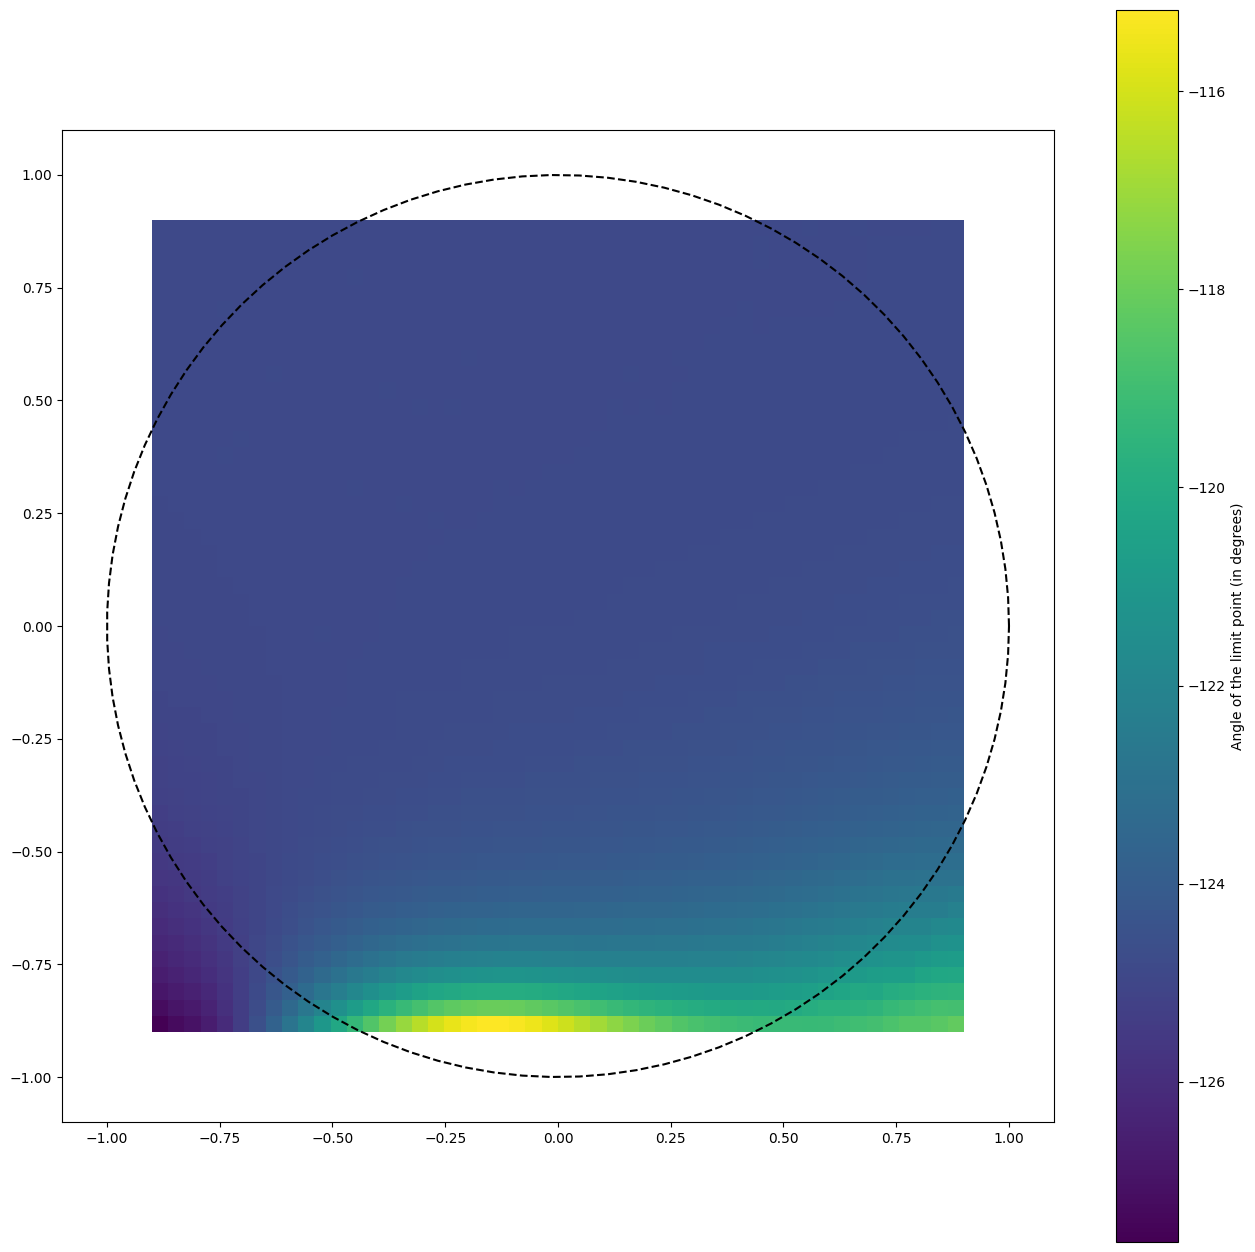

In [69]:

# plot results
plt.figure(figsize=(16, 16))
# plot the grid
plt.imshow(grid, cmap='viridis', extent=(min_param, max_param, min_param, max_param), origin='lower')

plt.colorbar(label='Angle of the limit point (in degrees)')

# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', label='Unit Circle')

# save fig
plt.savefig(str('D3_to_O2' + str(datetime.now()) + '.png' ))
plt.show()

